Objetivo final: Predecir el precio del vehículo.

Partes:
    E1: Data Engineering. Peso: 15% Inicio: 20/04 Entrega: 08/05 Recuperación: 08/06
    E2: Supervised ML. Peso: 15% Inicio:17/05 Entrega: 06/06 Recuperación: 24/08
    E3: Unsupervised ML. Peso: 15% Inicio:07/06 Entrega: 27/06 Recuperación: 24/08
    E4: Deep Learning. Peso: 15% Inicio: 28/06 Entrega: 18/07 Recuperación: 24/08

E1: Data Engineering.

Objetivo E1: data cleaning y data preprocessing de los datos.

Criterios de evaluación:
    - Limpieza de programa  (que no haya errores, que haya comentarios y el programa sea legible) 25%
    - Limpieza de datos 25%
    - Nuevas variables creadas 25%
    - Preprocesamiento 25%

In [1114]:
# Importo librarias.

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import plotly.express as px

In [1115]:
# Creo una variable para el df del csv.

df_bmw_pricing = pd.read_csv('C:/Users/victor.herranz/Desktop/Data Science/4. Git/Bmw pricing/bmw_pricing_v2.csv', sep = ",")

1. EDA

In [1116]:
df_bmw_pricing.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


Paso: Analizamos la estructura del dataset.

In [1117]:
df_bmw_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4841 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  4839 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

Comclusiones:
- Todas las variables (17) tienen un nombre comprensible.
- Tenemos datos de diferentes tipos que quizás tendremos que modificar más adelante.

Paso: breve anáisis estadístico de las variables numéricas.

In [1118]:
df_bmw_pricing.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


Conclusiones: Observamos que las tres variables numéricas tienen valores raros que tendremos que analizás con más profundidaz como km<0, potencia = 0 y precio min = 100 y max = 178k.

Creo una nueva variable para la antigüedad del vehículo.

In [1119]:
# Hacemos copia del dataset antes de hacer las primeras modificaciones.

df_bmw_pricing1 = df_bmw_pricing.copy()

In [1120]:
# Paso las fechas a formato date.

df_bmw_pricing1["fecha_venta"] = pd.to_datetime(df_bmw_pricing1["fecha_venta"])
df_bmw_pricing1["fecha_registro"] = pd.to_datetime(df_bmw_pricing1["fecha_registro"])

In [1121]:
df_bmw_pricing1["Antig"] = (df_bmw_pricing1["fecha_venta"]-df_bmw_pricing1["fecha_registro"])/datetime.timedelta(days=365.25)
df_bmw_pricing1["Antig"] = round(df_bmw_pricing1["Antig"], 1)

In [1122]:
# Separo las fechas en día/mes/año:

for col in ['fecha_registro', 'fecha_venta']:

       
    df_bmw_pricing1[col + '_DIA'] = df_bmw_pricing1[col].dt.day
    df_bmw_pricing1[col + '_MES'] = df_bmw_pricing1[col].dt.month
    df_bmw_pricing1[col + '_AÑO'] = df_bmw_pricing1[col].dt.year   
    
    del df_bmw_pricing1[col]

In [1123]:
df_bmw_pricing1.head()

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,gps,alerta_lim_velocidad,precio,Antig,fecha_registro_DIA,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO
0,BMW,118,140411.0,100.0,diesel,black,convertible,True,True,False,...,True,False,11300.0,5.9,1.0,2.0,2012.0,1.0,1.0,2018.0
1,BMW,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,...,True,True,69700.0,1.8,1.0,4.0,2016.0,1.0,2.0,2018.0
2,BMW,320,183297.0,120.0,diesel,white,convertible,False,False,False,...,True,False,10200.0,5.8,1.0,4.0,2012.0,1.0,2.0,2018.0
3,BMW,420,128035.0,135.0,diesel,red,convertible,True,True,False,...,True,True,25100.0,3.6,1.0,7.0,2014.0,1.0,2.0,2018.0
4,BMW,425,97097.0,160.0,diesel,silver,convertible,True,True,False,...,True,True,33400.0,3.3,1.0,12.0,2014.0,1.0,4.0,2018.0


2. Valores duplicados y nulos.

Paso: Analizamos las filas duplicadas.

In [1124]:
len(df_bmw_pricing1[df_bmw_pricing.duplicated()])

0

Conclusión: no hay duplicados.

Paso: Comprobamos valores nulos.

In [1125]:
df_bmw_pricing1.isnull().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
Antig                           2
fecha_registro_DIA              1
fecha_registro_MES              1
fecha_registro_AÑO              1
fecha_venta_DIA                 1
fecha_venta_MES                 1
fecha_venta_AÑO                 1
dtype: int64

Conclusión: todas las variables tienen valores nulos. Las analizaremos de una en una para determinar que hacer con ellas.  

In [1126]:
# Analizamos la variable "marca"
df_bmw_pricing1[ df_bmw_pricing1["marca"].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,gps,alerta_lim_velocidad,precio,Antig,fecha_registro_DIA,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO
161,NaN,520,246424.0,120.0,diesel,black,estate,True,True,False,...,True,False,6000.0,8.1,1.0,7.0,2010.0,1.0,8.0,2018.0
210,NaN,320,163879.0,120.0,diesel,grey,estate,False,False,False,...,True,False,8600.0,6.3,1.0,3.0,2012.0,1.0,6.0,2018.0


In [1127]:
# Sabemos que son BMW por lo que sustituimos los valores nulos por BMW.

df_bmw_pricing1["marca"].fillna("BMW", inplace=True)


In [1128]:
# Analizamos la variable "modelo".

df_bmw_pricing1[ df_bmw_pricing1["modelo"].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,gps,alerta_lim_velocidad,precio,Antig,fecha_registro_DIA,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO
173,BMW,NaN,146338.0,105.0,diesel,black,estate,False,True,False,...,True,True,13300.0,4.6,1.0,1.0,2014.0,1.0,8.0,2018.0
4766,BMW,NaN,115566.0,105.0,diesel,silver,suv,False,True,False,...,True,False,14900.0,4.7,1.0,1.0,2014.0,1.0,9.0,2018.0
4802,BMW,NaN,118640.0,110.0,diesel,white,van,False,False,False,...,False,False,800.0,3.5,1.0,9.0,2014.0,1.0,3.0,2018.0


In [1129]:
# Filtramos por 'tipo de coche' y 'potencia' para intentar deteminar que el modelo que estamos buscando:

df_bmw_pricing1[(df_bmw_pricing1['tipo_coche']=='estate') & (df_bmw_pricing1['potencia']==105.0)].value_counts("modelo")


modelo
318    172
518      7
dtype: int64

In [1130]:
# En este caso vemos que el nulo correspondiente al tipo de coche estate equivale a un 318 con una probabilidad de 172/179.

In [1131]:
# Hacemos lo mismo para los nulos de los tipo de coche suv:

df_bmw_pricing1[(df_bmw_pricing1['tipo_coche']=='suv') & (df_bmw_pricing1['potencia']==105.0)].value_counts("modelo")

modelo
X1    90
X3    21
dtype: int64

In [1132]:
# En este caso vemos que el nulo correspondiente al tipo de coche suv equivale a un X1 con una probabilidad de 60/111.

In [1133]:
# Hacemos lo mismo para los nulos de los tipo de coche van:

df_bmw_pricing1[(df_bmw_pricing1['tipo_coche']=='van') & (df_bmw_pricing1['potencia']==110.0) & (df_bmw_pricing1['color']=='white')].value_counts("modelo")

modelo
218    1
dtype: int64

In [1134]:
# En este caso vemos que el nulo correspondiente al tipo de coche van podría equivaler a un 218.

In [1135]:
# Sustituimos los nulos:

df_bmw_pricing1['modelo'][4802]=218

C:\Users\victor.herranz\AppData\Local\Temp\ipykernel_1424\1780303879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw_pricing1['modelo'][4802]=218


In [1136]:
df_bmw_pricing1['modelo'][173] = 318
df_bmw_pricing1['modelo'][4766] = 'X1'

C:\Users\victor.herranz\AppData\Local\Temp\ipykernel_1424\196623439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw_pricing1['modelo'][173] = 318
C:\Users\victor.herranz\AppData\Local\Temp\ipykernel_1424\196623439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw_pricing1['modelo'][4766] = 'X1'


<AxesSubplot:>

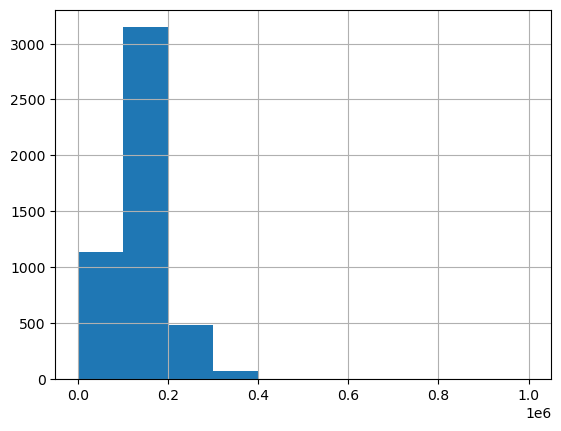

In [1137]:
# Analizamos los km.

df_bmw_pricing1["km"].hist()

In [1138]:
df_bmw_pricing1[df_bmw_pricing1["km"].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,gps,alerta_lim_velocidad,precio,Antig,fecha_registro_DIA,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO
459,BMW,520,NaN,135.0,diesel,black,estate,True,True,True,...,True,True,20300.0,5.2,1.0,12.0,2012.0,1.0,2.0,2018.0
4811,BMW,X3,NaN,190.0,diesel,blue,van,True,True,True,...,True,True,19500.0,4.7,1.0,11.0,2013.0,1.0,7.0,2018.0


In [1139]:
df_bmw_pricing1[df_bmw_pricing1["km"]>400000]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,gps,alerta_lim_velocidad,precio,Antig,fecha_registro_DIA,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO
557,BMW,520,484615.0,120.0,diesel,blue,estate,True,True,False,...,True,False,8300.0,7.1,1.0,2.0,2011.0,1.0,3.0,2018.0
1573,BMW,320,400654.0,110.0,diesel,black,estate,False,False,True,...,True,False,1800.0,11.6,1.0,12.0,2006.0,1.0,7.0,2018.0
2350,BMW,318,477571.0,85.0,diesel,grey,hatchback,False,True,False,...,False,False,1200.0,13.8,1.0,9.0,2004.0,1.0,7.0,2018.0
2829,BMW,525,439060.0,105.0,diesel,silver,sedan,False,False,True,...,True,False,100.0,21.4,1.0,10.0,1996.0,1.0,3.0,2018.0
3198,BMW,320,405816.0,100.0,diesel,blue,sedan,False,False,False,...,True,False,500.0,18.2,1.0,2.0,2000.0,1.0,5.0,2018.0
3732,BMW,118,1000376.0,90.0,diesel,black,subcompact,True,False,False,...,True,False,1400.0,13.3,1.0,3.0,2005.0,1.0,6.0,2018.0


In [1140]:
# Sustituimos los nulos por la media de km excluyendo el outlier con  1000376.0 kms.

media_km = df_bmw_pricing1[df_bmw_pricing1["km"]<500000]["km"].mean()

In [1141]:
df_bmw_pricing1["km"].fillna(media_km, inplace=True)

<AxesSubplot:>

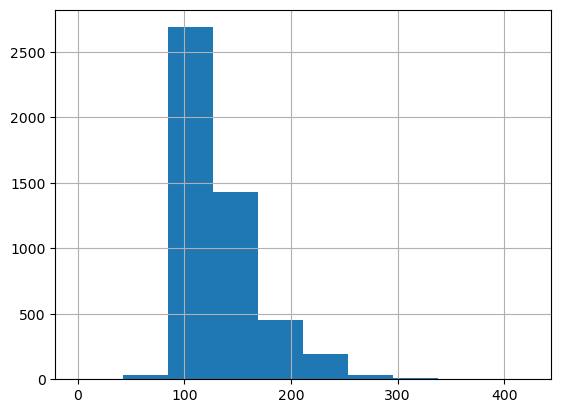

In [1142]:
# Analizamos la variable "potencia".
df_bmw_pricing1['potencia'].hist()

In [1143]:
# Sustituimos el null de 'potencia' con la media:
media_potencia = df_bmw_pricing1['potencia'].mean()
df_bmw_pricing1['potencia'].fillna(media_potencia, inplace=True)

In [1144]:
# Analizamos la variable "tipo_gasolina".

df_bmw_pricing1["tipo_gasolina"].value_counts(dropna=False)

diesel           4631
petrol            191
hybrid_petrol       8
NaN                 5
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

In [1145]:
# Para una mejor agrupación pongo todas las letras en minúscula.

df_bmw_pricing1['tipo_gasolina'] = df_bmw_pricing1['tipo_gasolina'].str.lower()



In [1146]:
# Sustituyo los nulos por "diesel".

df_bmw_pricing1["tipo_gasolina"].fillna("diesel", inplace=True)

In [1147]:
# Analizamos la variable "color".

df_bmw_pricing1["color"].value_counts(dropna=False)

black     1632
grey      1171
blue       707
white      537
brown      341
silver     327
red         51
beige       41
green       18
NaN         12
orange       6
Name: color, dtype: int64

In [1148]:
# Sustituyo los nulos por "SIN COLOR".

df_bmw_pricing1["color"].fillna("SIN COLOR", inplace=True)

In [1149]:
# Analizamos la variable "tipo de coche".

df_bmw_pricing1["tipo_coche"].value_counts(dropna=False)

estate         1604
sedan          1167
suv            1057
hatchback       699
subcompact      113
coupe           104
convertible      47
van              43
NaN               9
Name: tipo_coche, dtype: int64

In [1150]:
# Sustituyo los nulos por "SIN TIPO".

df_bmw_pricing1["tipo_coche"].fillna("SIN TIPO", inplace=True)

In [1151]:
# Analizamos la variable "volante_regulable".

df_bmw_pricing1["volante_regulable"].value_counts(dropna=False)

True     2662
False    2177
NaN         4
Name: volante_regulable, dtype: int64

In [1152]:
# Sustituyo los nulos por "True".

df_bmw_pricing1["volante_regulable"].fillna(True, inplace=True)

In [1153]:
# Analizamos la variable "aire_acondicionado".

df_bmw_pricing1["aire_acondicionado"].value_counts()

True     3837
False    1004
Name: aire_acondicionado, dtype: int64

In [1154]:
# Sustituyo los nulos por "True".

df_bmw_pricing1["aire_acondicionado"].fillna(True, inplace=True)

In [1155]:
# Analizamos la variable "camara_trasera".

df_bmw_pricing1["camara_trasera"].value_counts()

False    3864
True      977
Name: camara_trasera, dtype: int64

In [1156]:
# Sustituyo los nulos por "False".

df_bmw_pricing1["camara_trasera"].fillna(False, inplace=True)

In [1157]:
# Analizamos la variable "asientos_traseros_plegables".

df_bmw_pricing1["asientos_traseros_plegables"].value_counts()

False    3877
True      962
Name: asientos_traseros_plegables, dtype: int64

In [1158]:
# Sustituyo los nulos por "False".

df_bmw_pricing1["asientos_traseros_plegables"].fillna(False, inplace=True)

In [1159]:
# Analizamos la variable "elevalunas_electrico".

df_bmw_pricing1["elevalunas_electrico"].value_counts()

False    2612
True     2229
Name: elevalunas_electrico, dtype: int64

In [1160]:
# Sustituyo los nulos por "False".

df_bmw_pricing1['elevalunas_electrico'].fillna(False, inplace=True)

In [1161]:
# Analizamos la variable "bluetooth".

df_bmw_pricing1["bluetooth"].value_counts()

False    3670
True     1169
Name: bluetooth, dtype: int64

In [1162]:
# Sustituyo los nulos por "False".

df_bmw_pricing1['bluetooth'].fillna(False, inplace=True)


In [1163]:
# Analizamos la variable "alerta_lim_velocidad".

df_bmw_pricing1["alerta_lim_velocidad"].value_counts()

True     2618
False    2223
Name: alerta_lim_velocidad, dtype: int64

In [1164]:
# Sustituyo los nulos por "True".

df_bmw_pricing1['alerta_lim_velocidad'].fillna(True, inplace=True)

<AxesSubplot:>

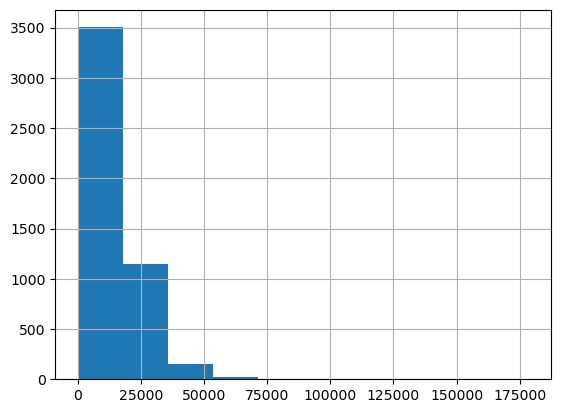

In [1165]:
# Analizamos la variable "precio".

df_bmw_pricing1["precio"].hist()

In [1166]:
df_bmw_pricing1[ df_bmw_pricing1["precio"].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,gps,alerta_lim_velocidad,precio,Antig,fecha_registro_DIA,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO
117,BMW,420,174740.0,135.0,diesel,white,coupe,True,True,True,...,True,True,NaN,4.5,1.0,11.0,2013.0,1.0,5.0,2018.0
524,BMW,520,163803.0,135.0,diesel,grey,estate,False,True,True,...,True,False,NaN,4.6,1.0,7.0,2013.0,1.0,2.0,2018.0
539,BMW,316,34489.0,85.0,diesel,black,estate,True,False,False,...,True,False,NaN,4.6,1.0,7.0,2013.0,1.0,2.0,2018.0
549,BMW,318,157129.0,100.0,diesel,blue,estate,True,True,True,...,True,True,NaN,4.5,1.0,9.0,2013.0,1.0,3.0,2018.0
569,BMW,320,166866.0,120.0,diesel,blue,estate,True,True,False,...,True,True,NaN,3.8,1.0,5.0,2014.0,1.0,3.0,2018.0
584,BMW,320,114771.0,135.0,diesel,blue,estate,False,True,False,...,True,False,NaN,3.8,1.0,5.0,2014.0,1.0,3.0,2018.0


In [1167]:
# Sustituyo los nulos por la media de los precios < 60k€ ya que los modelos de los coches no están en ese rango de precios.

media_precio =  df_bmw_pricing1[df_bmw_pricing1["precio"]<60000]['precio'].mean()
df_bmw_pricing1['precio'].fillna(media_precio, inplace=True)

<AxesSubplot:>

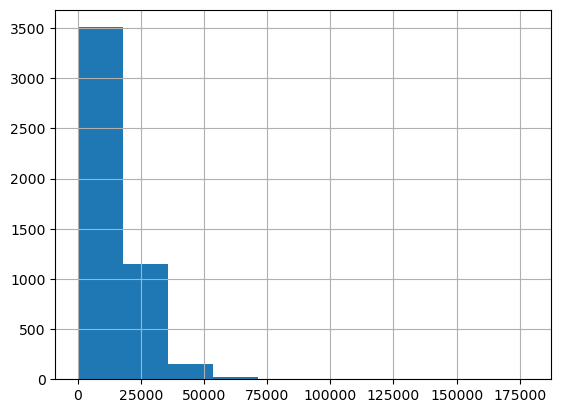

In [1168]:
df_bmw_pricing1['precio'].hist()

In [1169]:
# Analizamos el % de nulos de variable "Antig" (junto con precio y kms las más importantes) respecto el total:

len(df_bmw_pricing1[df_bmw_pricing1["Antig"].isnull()])/len(df_bmw_pricing1["Antig"])*100

0.041296716911005574

In [1170]:
# Al ser un % tan reducido elimino las filas:

df_bmw_pricing1.dropna(subset = ["Antig"], inplace=True)

In [1171]:
# Comprobamos que ya no tengamos nulos.

df_bmw_pricing1.isnull().sum()

marca                          0
modelo                         0
km                             0
potencia                       0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
Antig                          0
fecha_registro_DIA             0
fecha_registro_MES             0
fecha_registro_AÑO             0
fecha_venta_DIA                0
fecha_venta_MES                0
fecha_venta_AÑO                0
dtype: int64

In [1172]:
# Hacemos una copia:

df_bmw_pricing2 = df_bmw_pricing1.copy()

In [1173]:
df_bmw_pricing2['modelo'].value_counts(dropna=False)

320                752
520                633
318                567
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 78, dtype: int64

3. Limpieza de valores.

In [1174]:
# Agruparemos los valores de la variable 'modelo' < 5 unidades en una serie llamada frecuencias_modelo_reducida:

frecuencias_modelo = df_bmw_pricing2['modelo'].value_counts()
frecuencias_modelo_reducida = frecuencias_modelo[frecuencias_modelo < 3].index.to_list()
frecuencias_modelo_reducida


['430',
 '535 Gran Turismo',
 '750',
 '425',
 '650',
 'M4',
 '123',
 '220 Active Tourer',
 '216',
 218,
 ' Active Tourer',
 '225 Active Tourer',
 318,
 'M5',
 '735',
 'ActiveHybrid 5',
 '635',
 'M135',
 '225',
 'i8',
 '630',
 '214 Gran Tourer']

In [1175]:
# Hago un np.where

serie_modelo_reducida = np.where(df_bmw_pricing2['modelo'].isin(frecuencias_modelo_reducida), 'Otros',df_bmw_pricing2['modelo'])
serie_modelo_reducida


array(['118', 'Otros', '320', ..., '218 Gran Tourer', '218 Active Tourer',
       '525'], dtype=object)

In [1176]:
df_bmw_pricing2['modelo_reducida'] = serie_modelo_reducida

In [1177]:
df_bmw_pricing2['modelo_reducida'].value_counts()

320                  752
520                  633
318                  567
X3                   438
116                  358
X1                   275
316                  235
X5                   231
525                  183
530                  157
118                  143
318 Gran Turismo      97
320 Gran Turismo      73
518                   66
535                   46
X4                    46
X6                    44
420                   44
120                   36
730                   33
330                   33
420 Gran Coupé        33
Otros                 29
520 Gran Turismo      23
325                   19
640 Gran Coupé        19
530 Gran Turismo      18
740                   18
X5 M                  17
114                   15
218 Active Tourer     13
218                   12
M550                  12
218 Gran Tourer        9
640                    8
X6 M                   8
418 Gran Coupé         8
335                    7
M3                     7
528                    6


In [1178]:
del(df_bmw_pricing2['modelo'])

In [1179]:
#He intentado agrupar por cadenas de caracteres comunes como 'gran turismo' pero no lo he conseguido.
#df_bmw_pricing2[df_bmw_pricing2['modelo_reducida'].str.contains("Gran Turismo", case=False)]['modelo'].index.to_list()

In [1180]:
# Definimos el target:

target = ["precio"]

In [1181]:
# Separamos las variables según sean, target, categóricas, boolean o numéricas:

def obtener_lista_variables(dataset):
  
    lista_numericas = []
    lista_boolean = []
    lista_categoricas = []

    for i in dataset:
        if ((dataset[i].dtype.kind == "i") or (dataset[i].dtype.kind == "f")) and \
        i not in target and len(dataset[i].unique())!=2 :
            lista_numericas.append(i)
        elif (dataset[i].dtype.kind == "b") and i not in target and len(dataset[i].unique())==2 :
            lista_boolean.append(i)
        elif (dataset[i].dtype.kind=="O") and i not in target:
            lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas


Sustituyo el código en el elif de list_bool:

((dataset[i].dtype.kind == "i") or (dataset[i].dtype.kind == "f")) and \

por:

((dataset[i].dtype.kind == "b")

No se porque con la primera línea de código no detecta los booleans.

In [1182]:
list_num, list_bool, list_cat  = obtener_lista_variables(df_bmw_pricing2) 

In [1183]:
list_bool

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

In [1184]:
df_bmw_pricing2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4841 entries, 0 to 4842
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   km                           4841 non-null   float64
 2   potencia                     4841 non-null   float64
 3   tipo_gasolina                4841 non-null   object 
 4   color                        4841 non-null   object 
 5   tipo_coche                   4841 non-null   object 
 6   volante_regulable            4841 non-null   bool   
 7   aire_acondicionado           4841 non-null   bool   
 8   camara_trasera               4841 non-null   bool   
 9   asientos_traseros_plegables  4841 non-null   bool   
 10  elevalunas_electrico         4841 non-null   bool   
 11  bluetooth                    4841 non-null   bool   
 12  gps                          4841 non-null   bool   
 13  alerta_lim_velocid

Observando de nuevo la estructura de los datos de nuestro dataset, lo que haremos será analizar las variables numéricas y categóricas una a una ya que las booleanas ya están limpias y normalizadas por si mismas. 

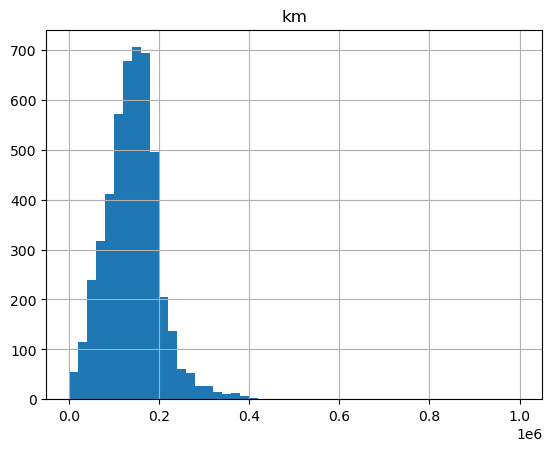

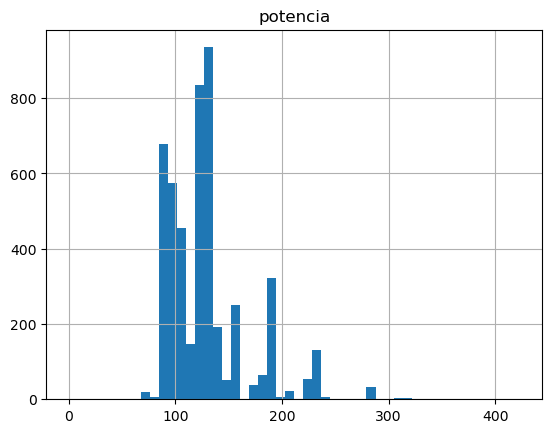

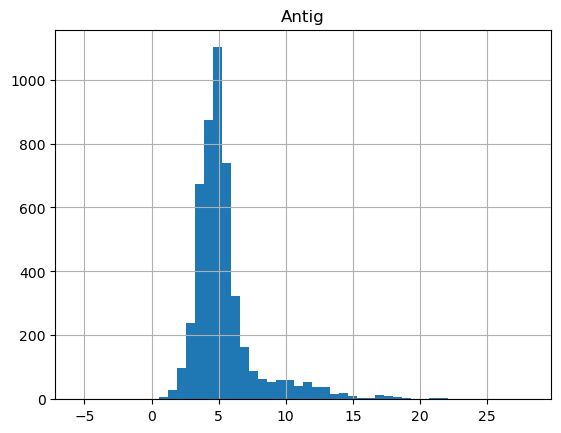

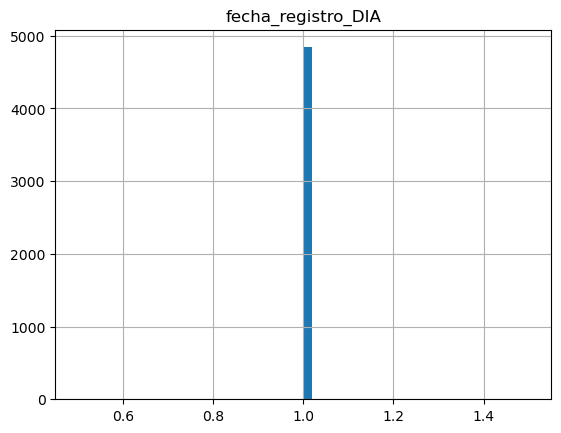

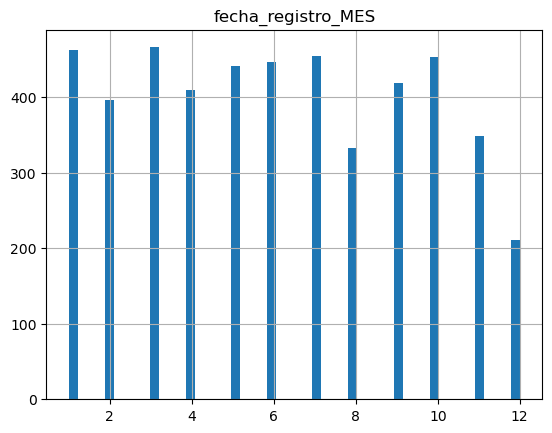

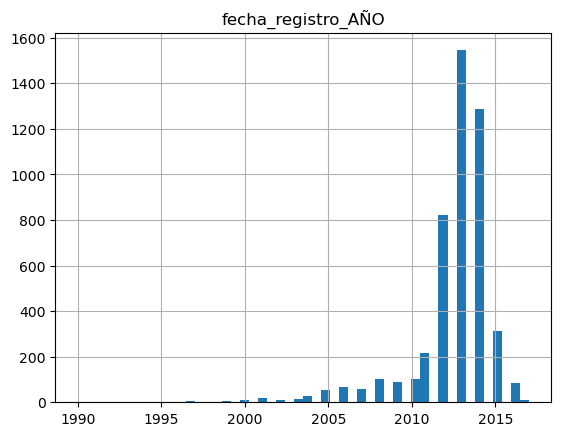

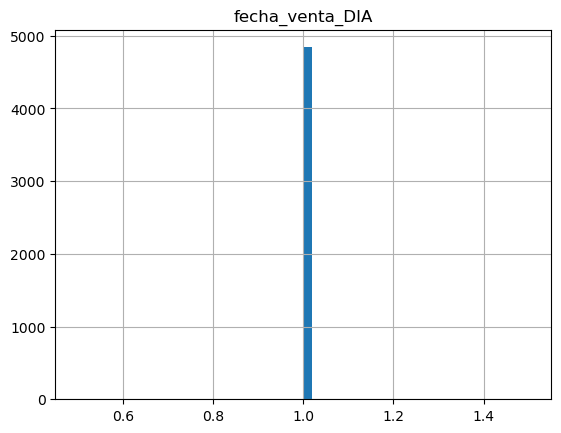

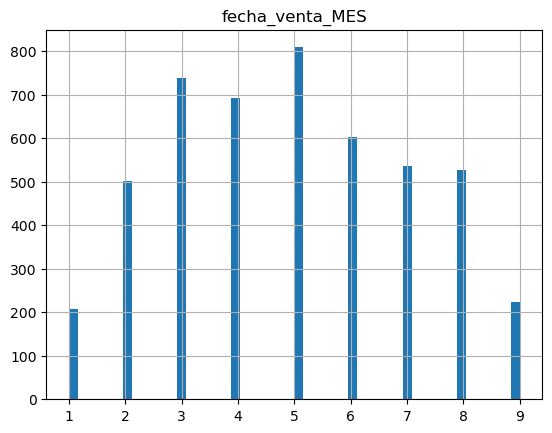

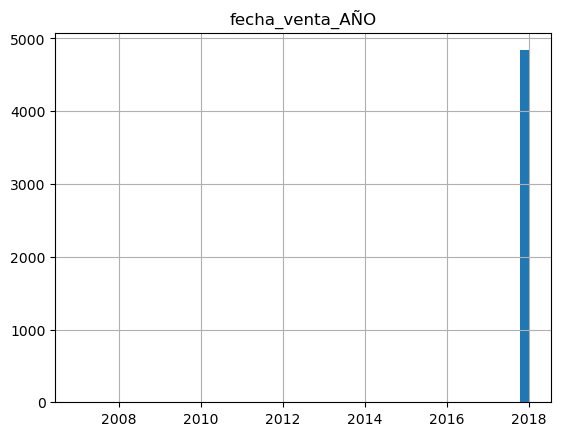

In [1185]:
# Analizamos la forma de todas las columnas numéricas:

for i in list_num:
    df_bmw_pricing2.hist(i, bins = 50)

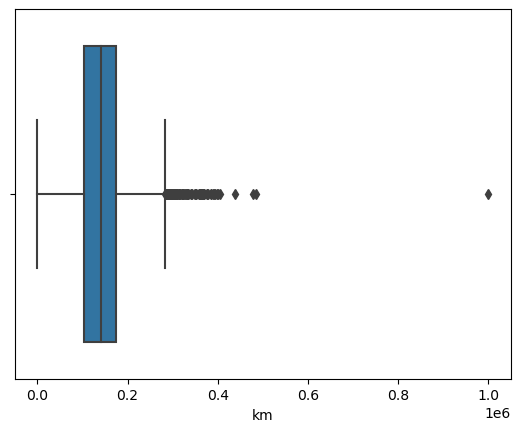

In [1186]:
# Respecto los kms, observamos una distribución normal ligermente sesgada hacia la derecha (distribución asimétrica positiva) causada por algun valor extremo. 
# Podermos visualizar los outliers:

sns.boxplot( x = "km", data=df_bmw_pricing2);


In [1187]:
# Respecto la potencia, observamos diferentes distribuciones normales dentro del mismo gráfico. Probablemente derivado de los diferentes modelos de automovil.

In [1188]:
# Miramos la forma de todas las columnas categóricas:

for i in list_cat:
    print(df_bmw_pricing2[i].value_counts())

BMW    4841
Name: marca, dtype: int64
diesel           4639
petrol            191
hybrid_petrol       8
electro             3
Name: tipo_gasolina, dtype: int64
black        1631
grey         1171
blue          707
white         537
brown         341
silver        326
red            51
beige          41
green          18
SIN COLOR      12
orange          6
Name: color, dtype: int64
estate         1602
sedan          1167
suv            1057
hatchback       699
subcompact      113
coupe           104
convertible      47
van              43
SIN TIPO          9
Name: tipo_coche, dtype: int64
320                  752
520                  633
318                  567
X3                   438
116                  358
X1                   275
316                  235
X5                   231
525                  183
530                  157
118                  143
318 Gran Turismo      97
320 Gran Turismo      73
518                   66
535                   46
X4                    46
X6   

In [1189]:
# Hacemos una copia:

df_bmw_pricing3 = df_bmw_pricing2.copy()

Analizamos la lógica de las variables, así como los valores extremos (outliers). Iremos variable por variable.

Observamos km negativos y positivos muy grandes. Los negativos los cambio a positivos y los grandes los dejo como están de momento.

In [1190]:
df_bmw_pricing3[df_bmw_pricing2["km"]<10]

,marca,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,...,alerta_lim_velocidad,precio,Antig,fecha_registro_DIA,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO,modelo_reducida
2938,BMW,-64.0,230.0,diesel,black,sedan,True,True,False,True,...,True,75000.0,1.1,1.0,3.0,2017.0,1.0,4.0,2018.0,640 Gran Coupé


In [1191]:
# Sustituimos el -64km por +64km.

df_bmw_pricing3["km"].replace(-64, 64, inplace=True)

Observamos un coche con potencia = 0 lo que no es posible. Lo sustituiremos por la media de los modelos de X1

In [1192]:
media_potencia_X1 = df_bmw_pricing3[df_bmw_pricing3["modelo_reducida"]=="X1"]["potencia"].mean()

In [1193]:
df_bmw_pricing3["potencia"].replace(0, media_potencia_X1, inplace=True)

Analizamos la correlación de las variables.

In [1194]:
df_bmw_pricing4 = df_bmw_pricing3.copy()

In [1195]:
corr = df_bmw_pricing4.corr()
corr.style.background_gradient(cmap="coolwarm")

c:\Users\victor.herranz\Anaconda3\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\victor.herranz\Anaconda3\lib\site-packages\pandas\io\formats\style.py:3556: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,Antig,fecha_registro_DIA,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO
km,1.000000,-0.050635,0.065866,0.010661,0.002469,-0.052772,0.047629,-0.029308,0.154754,-0.041276,-0.409683,0.499424,nan,-0.017027,-0.506695,nan,0.000134,-0.032407
potencia,-0.050635,1.000000,0.327010,0.199990,0.313159,0.448036,0.339849,0.232010,0.006767,0.488378,0.639596,-0.084336,nan,-0.000229,0.082900,nan,-0.028574,-0.001689
volante_regulable,0.065866,0.327010,1.000000,0.305840,0.253479,0.230613,0.278574,0.134572,0.244265,0.224794,0.268370,0.075682,nan,-0.034707,-0.067127,nan,0.078870,-0.000134
aire_acondicionado,0.010661,0.199990,0.305840,1.000000,0.151249,0.149645,0.284749,0.135767,0.370536,0.224165,0.246501,-0.231629,nan,0.013696,0.233805,nan,0.011279,0.003960
camara_trasera,0.002469,0.313159,0.253479,0.151249,1.000000,0.200060,0.198962,0.144744,0.062048,0.201459,0.251929,0.023466,nan,0.030032,-0.024196,nan,0.019418,0.014352
asientos_traseros_plegables,-0.052772,0.448036,0.230613,0.149645,0.200060,1.000000,0.250358,0.153248,0.126247,0.276907,0.414266,-0.053292,nan,-0.017767,0.060052,nan,0.036072,0.014223
elevalunas_electrico,0.047629,0.339849,0.278574,0.284749,0.198962,0.250358,1.000000,0.256366,0.203342,0.331923,0.260256,-0.090713,nan,-0.004346,0.090405,nan,-0.020938,-0.002267
bluetooth,-0.029308,0.232010,0.134572,0.135767,0.144744,0.153248,0.256366,1.000000,0.129346,0.120653,0.210346,-0.070434,nan,-0.003212,0.072609,nan,-0.011972,0.016114
gps,0.154754,0.006767,0.244265,0.370536,0.062048,0.126247,0.203342,0.129346,1.000000,-0.064252,-0.005136,0.077482,nan,-0.016004,-0.072725,nan,0.062745,-0.007712
alerta_lim_velocidad,-0.041276,0.488378,0.224794,0.224165,0.201459,0.276907,0.331923,0.120653,-0.064252,1.000000,0.443070,-0.182123,nan,-0.000395,0.181235,nan,-0.041400,0.000842


In [1196]:
# Elimino variables de fecha_registro_DIA, fecha_registro_MES, fecha_venta_DIA:

del(df_bmw_pricing4["fecha_registro_DIA"])
del(df_bmw_pricing4["fecha_registro_MES"])
del(df_bmw_pricing4["fecha_venta_DIA"])

In [1197]:
corr = df_bmw_pricing4.corr()
corr.style.background_gradient(cmap="coolwarm")

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,Antig,fecha_registro_AÑO,fecha_venta_MES,fecha_venta_AÑO
km,1.000000,-0.050635,0.065866,0.010661,0.002469,-0.052772,0.047629,-0.029308,0.154754,-0.041276,-0.409683,0.499424,-0.506695,0.000134,-0.032407
potencia,-0.050635,1.000000,0.327010,0.199990,0.313159,0.448036,0.339849,0.232010,0.006767,0.488378,0.639596,-0.084336,0.082900,-0.028574,-0.001689
volante_regulable,0.065866,0.327010,1.000000,0.305840,0.253479,0.230613,0.278574,0.134572,0.244265,0.224794,0.268370,0.075682,-0.067127,0.078870,-0.000134
aire_acondicionado,0.010661,0.199990,0.305840,1.000000,0.151249,0.149645,0.284749,0.135767,0.370536,0.224165,0.246501,-0.231629,0.233805,0.011279,0.003960
camara_trasera,0.002469,0.313159,0.253479,0.151249,1.000000,0.200060,0.198962,0.144744,0.062048,0.201459,0.251929,0.023466,-0.024196,0.019418,0.014352
asientos_traseros_plegables,-0.052772,0.448036,0.230613,0.149645,0.200060,1.000000,0.250358,0.153248,0.126247,0.276907,0.414266,-0.053292,0.060052,0.036072,0.014223
elevalunas_electrico,0.047629,0.339849,0.278574,0.284749,0.198962,0.250358,1.000000,0.256366,0.203342,0.331923,0.260256,-0.090713,0.090405,-0.020938,-0.002267
bluetooth,-0.029308,0.232010,0.134572,0.135767,0.144744,0.153248,0.256366,1.000000,0.129346,0.120653,0.210346,-0.070434,0.072609,-0.011972,0.016114
gps,0.154754,0.006767,0.244265,0.370536,0.062048,0.126247,0.203342,0.129346,1.000000,-0.064252,-0.005136,0.077482,-0.072725,0.062745,-0.007712
alerta_lim_velocidad,-0.041276,0.488378,0.224794,0.224165,0.201459,0.276907,0.331923,0.120653,-0.064252,1.000000,0.443070,-0.182123,0.181235,-0.041400,0.000842


In [1198]:
# Elimino la variable fecha_registro_AÑO por su fuerte correlación con antig.

del(df_bmw_pricing4["fecha_registro_AÑO"])

In [1199]:
corr = df_bmw_pricing4.corr()
corr.style.background_gradient(cmap="coolwarm")

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,Antig,fecha_venta_MES,fecha_venta_AÑO
km,1.000000,-0.050635,0.065866,0.010661,0.002469,-0.052772,0.047629,-0.029308,0.154754,-0.041276,-0.409683,0.499424,0.000134,-0.032407
potencia,-0.050635,1.000000,0.327010,0.199990,0.313159,0.448036,0.339849,0.232010,0.006767,0.488378,0.639596,-0.084336,-0.028574,-0.001689
volante_regulable,0.065866,0.327010,1.000000,0.305840,0.253479,0.230613,0.278574,0.134572,0.244265,0.224794,0.268370,0.075682,0.078870,-0.000134
aire_acondicionado,0.010661,0.199990,0.305840,1.000000,0.151249,0.149645,0.284749,0.135767,0.370536,0.224165,0.246501,-0.231629,0.011279,0.003960
camara_trasera,0.002469,0.313159,0.253479,0.151249,1.000000,0.200060,0.198962,0.144744,0.062048,0.201459,0.251929,0.023466,0.019418,0.014352
asientos_traseros_plegables,-0.052772,0.448036,0.230613,0.149645,0.200060,1.000000,0.250358,0.153248,0.126247,0.276907,0.414266,-0.053292,0.036072,0.014223
elevalunas_electrico,0.047629,0.339849,0.278574,0.284749,0.198962,0.250358,1.000000,0.256366,0.203342,0.331923,0.260256,-0.090713,-0.020938,-0.002267
bluetooth,-0.029308,0.232010,0.134572,0.135767,0.144744,0.153248,0.256366,1.000000,0.129346,0.120653,0.210346,-0.070434,-0.011972,0.016114
gps,0.154754,0.006767,0.244265,0.370536,0.062048,0.126247,0.203342,0.129346,1.000000,-0.064252,-0.005136,0.077482,0.062745,-0.007712
alerta_lim_velocidad,-0.041276,0.488378,0.224794,0.224165,0.201459,0.276907,0.331923,0.120653,-0.064252,1.000000,0.443070,-0.182123,-0.041400,0.000842


Analizamos la distribución de Target (ha de ser normal)

array([[<AxesSubplot:title={'center':'precio'}>]], dtype=object)

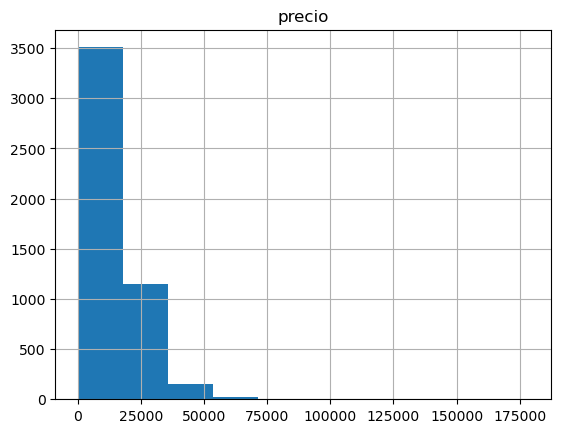

In [1200]:
df_bmw_pricing4.hist(target)

<AxesSubplot:xlabel='precio'>

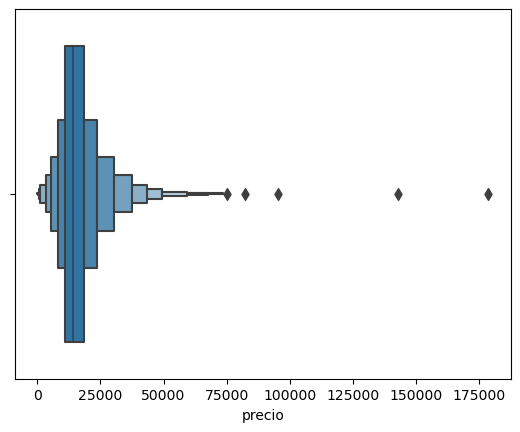

In [1201]:
sns.boxenplot(x = df_bmw_pricing4['precio'])

<AxesSubplot:>

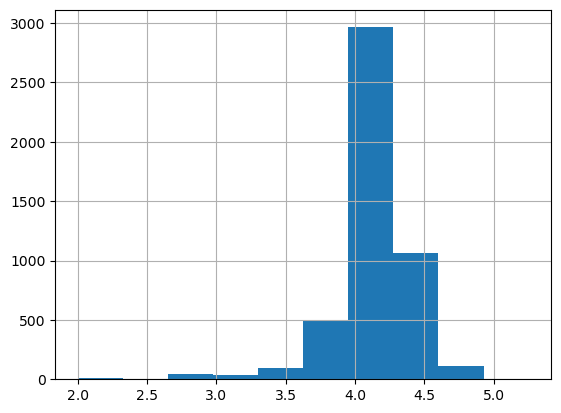

In [1202]:
# Aplicamos una logarítmica para normalizar:

df_bmw_pricing4["LOG_TARGET"] = np.log10(df_bmw_pricing4["precio"])
df_bmw_pricing4["LOG_TARGET"].hist()


In [1203]:
target = ['precio', 'LOG_TARGET']


Target Vs variables independientes

In [1204]:
df_bmw_pricing4.head()

,marca,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,Antig,fecha_venta_MES,fecha_venta_AÑO,modelo_reducida,LOG_TARGET
0,BMW,140411.0,100.0,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,5.9,1.0,2018.0,118,4.053078
1,BMW,13929.0,317.0,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,1.8,2.0,2018.0,Otros,4.843233
2,BMW,183297.0,120.0,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,5.8,2.0,2018.0,320,4.008600
3,BMW,128035.0,135.0,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,3.6,2.0,2018.0,420,4.399674
4,BMW,97097.0,160.0,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,3.3,4.0,2018.0,Otros,4.523746


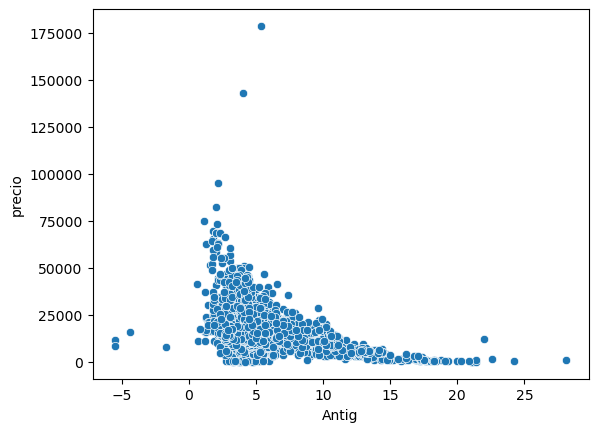

In [1205]:
sns.scatterplot(x="Antig", y="precio", data=df_bmw_pricing4);

In [1206]:
# Elimino las antigüdades negativas. Hago una copia antes:
df_bmw_pricing5 = df_bmw_pricing4.copy()

In [1207]:
df_bmw_pricing5 = df_bmw_pricing5.drop(df_bmw_pricing5[df_bmw_pricing5["Antig"]<0].index)

In [1208]:
# Reseteamos el index:

df_bmw_pricing5.reset_index(drop=True)

,marca,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,Antig,fecha_venta_MES,fecha_venta_AÑO,modelo_reducida,LOG_TARGET
0,BMW,140411.0,100.0,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,5.9,1.0,2018.0,118,4.053078
1,BMW,13929.0,317.0,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,1.8,2.0,2018.0,Otros,4.843233
2,BMW,183297.0,120.0,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,5.8,2.0,2018.0,320,4.008600
3,BMW,128035.0,135.0,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,3.6,2.0,2018.0,420,4.399674
4,BMW,97097.0,160.0,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,3.3,4.0,2018.0,Otros,4.523746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4832,BMW,39743.0,110.0,diesel,black,van,False,True,False,False,False,False,True,False,14600.0,2.8,8.0,2018.0,218 Gran Tourer,4.164353
4833,BMW,49832.0,100.0,diesel,grey,van,False,True,False,False,False,False,True,True,17500.0,3.2,8.0,2018.0,218 Active Tourer,4.243038
4834,BMW,19633.0,110.0,diesel,grey,van,False,True,False,False,False,False,True,True,17000.0,2.9,9.0,2018.0,218 Gran Tourer,4.230449
4835,BMW,27920.0,110.0,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2.4,9.0,2018.0,218 Active Tourer,4.356026


In [1209]:
# Elimino los precios > 100.000 €

df_bmw_pricing5 = df_bmw_pricing5.drop(df_bmw_pricing5[df_bmw_pricing5["precio"]>100000].index)
df_bmw_pricing5.reset_index(drop=True)

,marca,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,Antig,fecha_venta_MES,fecha_venta_AÑO,modelo_reducida,LOG_TARGET
0,BMW,140411.0,100.0,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,5.9,1.0,2018.0,118,4.053078
1,BMW,13929.0,317.0,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,1.8,2.0,2018.0,Otros,4.843233
2,BMW,183297.0,120.0,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,5.8,2.0,2018.0,320,4.008600
3,BMW,128035.0,135.0,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,3.6,2.0,2018.0,420,4.399674
4,BMW,97097.0,160.0,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,3.3,4.0,2018.0,Otros,4.523746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,BMW,39743.0,110.0,diesel,black,van,False,True,False,False,False,False,True,False,14600.0,2.8,8.0,2018.0,218 Gran Tourer,4.164353
4831,BMW,49832.0,100.0,diesel,grey,van,False,True,False,False,False,False,True,True,17500.0,3.2,8.0,2018.0,218 Active Tourer,4.243038
4832,BMW,19633.0,110.0,diesel,grey,van,False,True,False,False,False,False,True,True,17000.0,2.9,9.0,2018.0,218 Gran Tourer,4.230449
4833,BMW,27920.0,110.0,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2.4,9.0,2018.0,218 Active Tourer,4.356026


In [1210]:
# Elimino la fila con km > 500.000 
df_bmw_pricing5 = df_bmw_pricing5.drop(df_bmw_pricing5[df_bmw_pricing5["km"]>500000].index)
df_bmw_pricing5.reset_index(drop=True)

,marca,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,Antig,fecha_venta_MES,fecha_venta_AÑO,modelo_reducida,LOG_TARGET
0,BMW,140411.0,100.0,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,5.9,1.0,2018.0,118,4.053078
1,BMW,13929.0,317.0,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,1.8,2.0,2018.0,Otros,4.843233
2,BMW,183297.0,120.0,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,5.8,2.0,2018.0,320,4.008600
3,BMW,128035.0,135.0,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,3.6,2.0,2018.0,420,4.399674
4,BMW,97097.0,160.0,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,3.3,4.0,2018.0,Otros,4.523746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829,BMW,39743.0,110.0,diesel,black,van,False,True,False,False,False,False,True,False,14600.0,2.8,8.0,2018.0,218 Gran Tourer,4.164353
4830,BMW,49832.0,100.0,diesel,grey,van,False,True,False,False,False,False,True,True,17500.0,3.2,8.0,2018.0,218 Active Tourer,4.243038
4831,BMW,19633.0,110.0,diesel,grey,van,False,True,False,False,False,False,True,True,17000.0,2.9,9.0,2018.0,218 Gran Tourer,4.230449
4832,BMW,27920.0,110.0,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2.4,9.0,2018.0,218 Active Tourer,4.356026


In [1211]:
# Elimino las columnas que no tengan peso en mi modelo por no tener diversidad en los datos: marca y fecha_venta_AÑO:

del(df_bmw_pricing5["marca"])
del(df_bmw_pricing5["fecha_venta_AÑO"])

In [1212]:
df_bmw_pricing5.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,Antig,fecha_venta_MES,modelo_reducida,LOG_TARGET
0,140411.0,100.0,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,5.9,1.0,118,4.053078
1,13929.0,317.0,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,1.8,2.0,Otros,4.843233
2,183297.0,120.0,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,5.8,2.0,320,4.008600
3,128035.0,135.0,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,3.6,2.0,420,4.399674
4,97097.0,160.0,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,3.3,4.0,Otros,4.523746


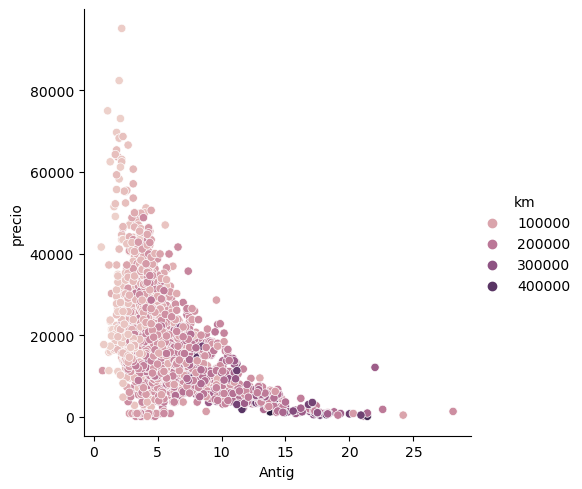

In [1213]:
sns.relplot(x="Antig", y="precio", hue="km", data=df_bmw_pricing5);

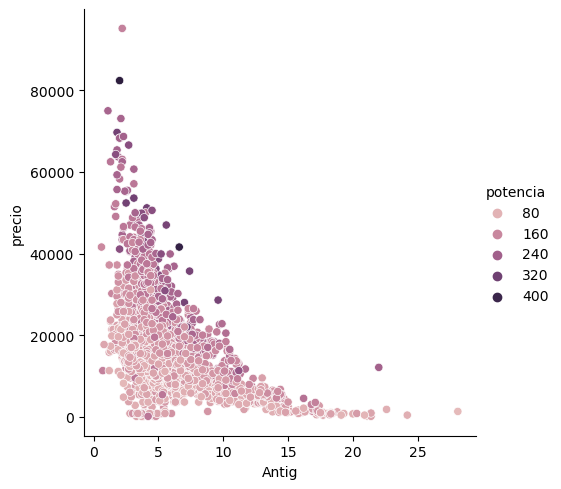

In [1214]:
sns.relplot(x="Antig", y="precio", hue="potencia", data=df_bmw_pricing5);

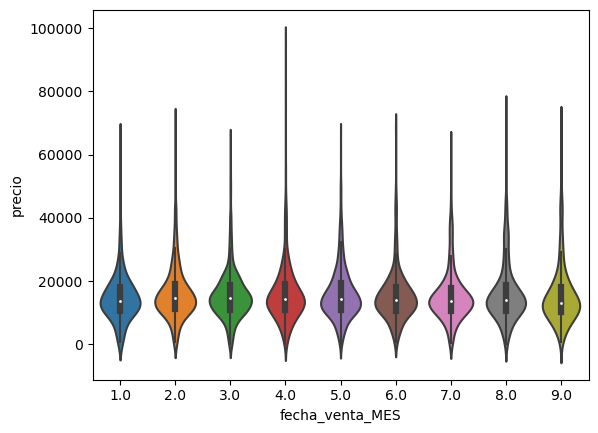

In [1215]:
sns.violinplot(x="fecha_venta_MES", y="precio", data=df_bmw_pricing5);

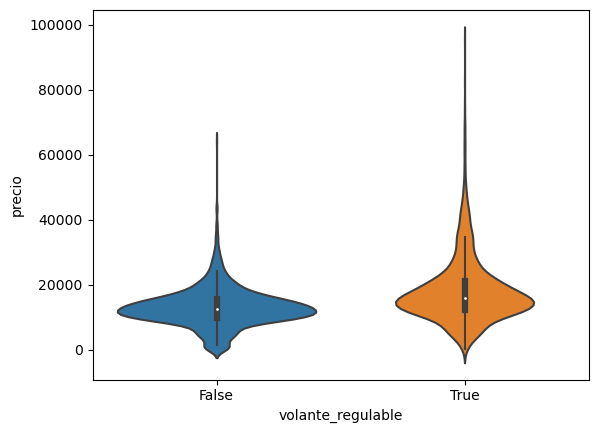

In [1216]:
sns.violinplot(x="volante_regulable", y="precio", data=df_bmw_pricing5);

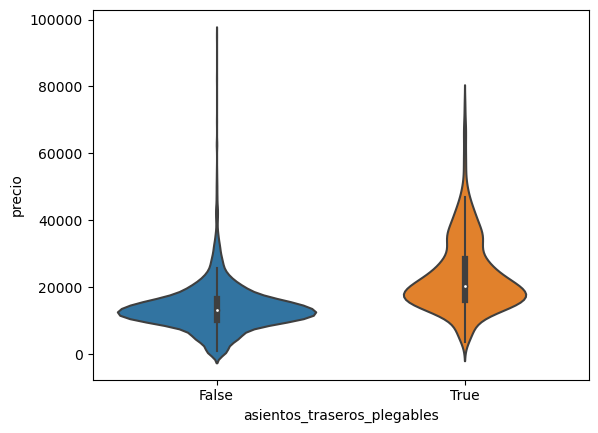

In [1217]:
sns.violinplot(x="asientos_traseros_plegables", y="precio", data=df_bmw_pricing5);

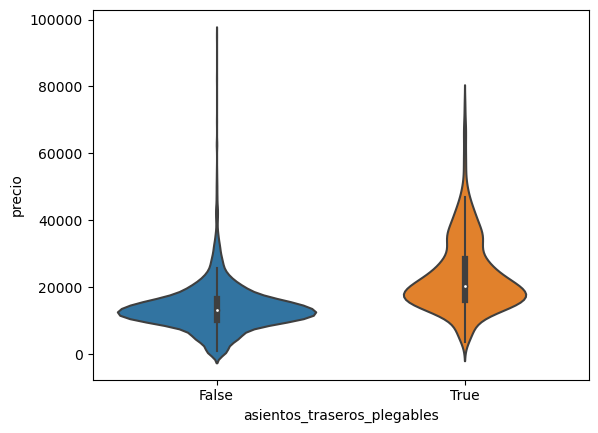

In [1218]:
sns.violinplot(x="asientos_traseros_plegables", y="precio", data=df_bmw_pricing5);

Normalización de la tabla

In [1219]:
# Pongo valores numéricos a las variables categoricas:
# One Hot Encoding: para sustituir variables categóricas por números. Crea tantas columnas como tipos de datos diferentes. 

In [1220]:
list_num, list_bool, list_cat = obtener_lista_variables(df_bmw_pricing5)

In [1221]:
df_bmw_pricing6 = pd.get_dummies(data=df_bmw_pricing5, columns=list_cat)

In [1224]:
corr=df_bmw_pricing6.corr()
corr.style.background_gradient(cmap="coolwarm")

In [1225]:
# Hago una copia antes de normalizar las variables numéricas:

df_bmw_pricing7 = df_bmw_pricing6.copy()

In [1226]:
# Pongo valores de 0 o 1 para los boolean:

df_bmw_pricing7 = pd.get_dummies(data=df_bmw_pricing7, columns=list_bool)

In [1227]:
# Pongo valores entre 0 o 1 a los numericos:

minMaxResultado = MinMaxScaler()

for i in list_num:
    df_bmw_pricing7[i] = minMaxResultado.fit_transform(df_bmw_pricing7[i].values.reshape(-1,1))

In [1228]:
df_bmw_pricing7.reset_index(drop=True, inplace=True)

In [1230]:
corr = df_bmw_pricing7.corr()
corr.style.background_gradient(cmap="coolwarm")

In [1231]:
df_bmw_pricing7.head()

,km,potencia,precio,Antig,fecha_venta_MES,LOG_TARGET,tipo_gasolina_diesel,tipo_gasolina_electro,tipo_gasolina_hybrid_petrol,tipo_gasolina_petrol,...,asientos_traseros_plegables_False,asientos_traseros_plegables_True,elevalunas_electrico_False,elevalunas_electrico_True,bluetooth_False,bluetooth_True,gps_False,gps_True,alerta_lim_velocidad_False,alerta_lim_velocidad_True
0,0.289643,0.188442,11300.0,0.192727,0.000,4.053078,1,0,0,0,...,1,0,0,1,0,1,0,1,1,0
1,0.028614,0.733668,69700.0,0.043636,0.125,4.843233,0,0,0,1,...,1,0,1,0,0,1,0,1,0,1
2,0.378150,0.238693,10200.0,0.189091,0.125,4.008600,1,0,0,0,...,1,0,0,1,1,0,0,1,1,0
3,0.264102,0.276382,25100.0,0.109091,0.125,4.399674,1,0,0,0,...,1,0,0,1,0,1,0,1,0,1
4,0.200253,0.339196,33400.0,0.098182,0.375,4.523746,1,0,0,0,...,1,0,1,0,0,1,0,1,0,1


In [1232]:
# Finalmente creo un pickle:

pd.to_pickle(df_bmw_pricing7, 'df_bmw_pricing_final')